# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab_final` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

<font color='magenta'>
Please comment before each cell of code using a markdown cell. You should clearly state with your own words what the portion of code in the cell bellow does or add other insightful comments on that operation. Use the html tags in this cell to add your comments in a striking color for an easy review.
</font>

### 01 - Problem (case study)

- Data Description.
- Goal.

**Data Description:**

- **customer:** Customer ID
- **state:** US State
- **customer_lifetime_value:** CLV is the client economic value for a company during all their relationship
- **response:** Response to marketing calls (customer engagement)
- **coverage:** Customer coverage type
- **education:** Customer education level
- **effective_to_date:** Effective to date
- **employmentstatus:** Customer employment status
- **gender:** Customer gender
- **income:** Customer income
- **location_code:** Customer living zone
- **marital_status:** Customer marital status
- **monthly_premium_auto:** Monthly premium
- **months_since_last_claim:** Last customer claim
- **months_since_policy_inception:** Policy Inception
- **number_of_open_complaints:** Open claims
- **number_of_policies:** Number policies
- **policy_type:** Policy type
- **policy:** Policy
- **renew_offer_type:** Renew
- **sales_channel:** Sales channel (customer-company first contact)
- **total_claim_amount:** Claims amount
- **vehicle_class:** Vehicle class
- **vehicle_size:** Vehicle size
- **vehicle_type:** Vehicle type

**Goal**: <font color='magenta'>Predict the amount that will be claimed by a client
</font>

### 02 - Getting Data

- Read the `.csv` file.

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

data = pd.read_csv("./files_for_lab_final/csv_files/marketing_customer_analysis.csv")

### 03 - Cleaning/Wrangling/EDA

- Change headers names.

In [2]:
data.columns = [e.lower().replace(' ' , '_') for e in data.columns]

<font color='magenta'>
Convertimos, mediante una expresión de list comprehensión, las mayúsculas a minúsculas y substituimos los espacios por guiones bajos, unificando así el formato de las cabeceras.
    
Forma Alternativa: Sin usar list comprehension</font>

- Deal with NaN values.

In [3]:
data=data.dropna()
data = data.drop(columns=["customer"]) #No nos interesa el ID interno que usa la empresa

<font color='magenta'>
Se puede revisar si hay NaN's con los métodos .info o .isna().sum(), pero no es necesario. Sólo con el método .dropna() ya nos aseguramos que los eliminamos, los hubiera o no en un inicio.
</font>

- Categorical Features.

In [4]:
# Lista de columnas categóricas

cat_cols = [col for col in data.columns if (data[col].dtype==object)]

#Información de dichas columnas

for c in cat_cols:
    print(f'Name: {data[c].name}') # Nombre
    print(f'Type: {data[c].dtype}') # Tipo
    print(f'Unique values: {len(data[c].unique())}') # Valores Únicos
    print(((data[c].value_counts() / sum(data[c].value_counts()))*100)) #Porcentaje de veces que aparece cada una respecto al total de la columna
    

Name: state
Type: object
Unique values: 5
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64
Name: response
Type: object
Unique values: 2
No     85.679877
Yes    14.320123
Name: response, dtype: float64
Name: coverage
Type: object
Unique values: 3
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64
Name: education
Type: object
Unique values: 5
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64
Name: effective_to_date
Type: object
Unique values: 59
1/10/11    2.134881
1/27/11    2.123933
2/14/11    2.036348
1/26/11    1.981607
1/17/11    1.970659
1/19/11    1.959711
1/31/11    1.948763
1/3/11     1.948763
1/20/11    1.894022
2/26/11    1.850230
1/28/11    1.850230
2/19/11    1.839282
1/5/11     1.82

<font color='magenta'>
Otra vez con list comprehension, nos quedamos con las columnas categóricas en base a si son tipo object y luego mostramos diversa información sobre éstas.
</font>

- Numerical Features.

In [5]:
num_cols = [c for c in data.columns if (data[c].dtype!='object') and (c!='Effective To Date')]

<font color='magenta'>
Nos quedamos con las columnas que no son tipo object ni tipo fecha
</font>

- Exploration.

**Bar plot for each categorical variable.**

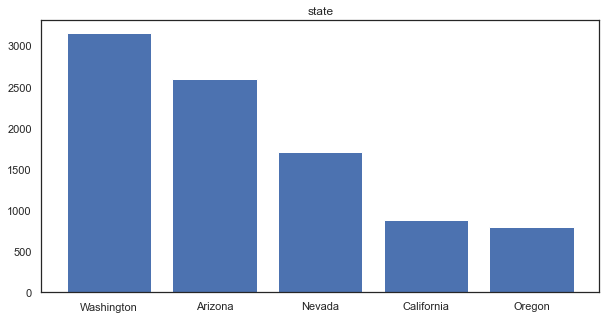

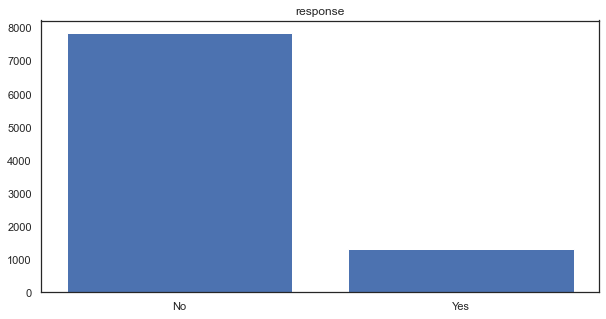

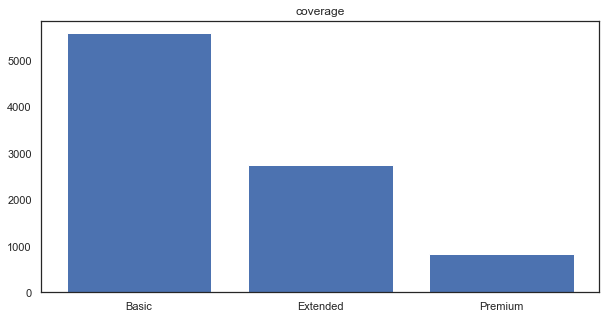

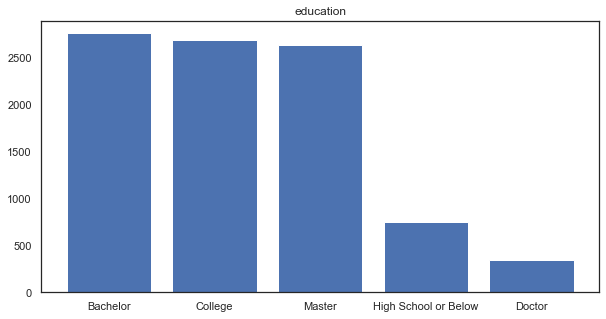

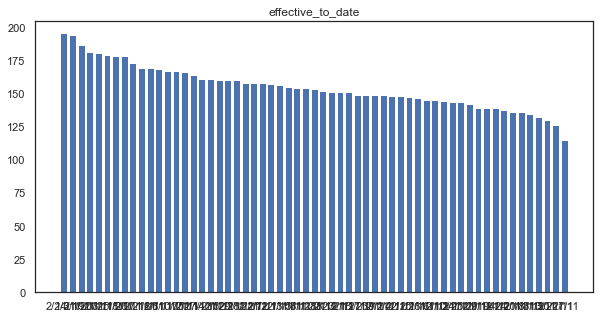

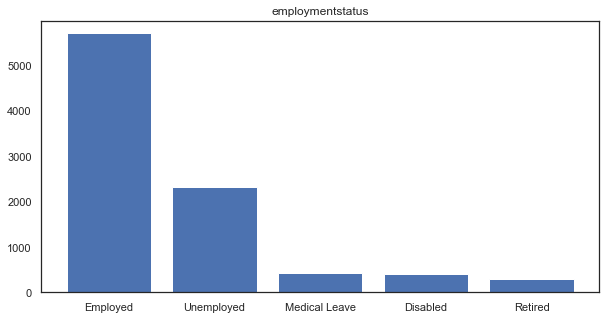

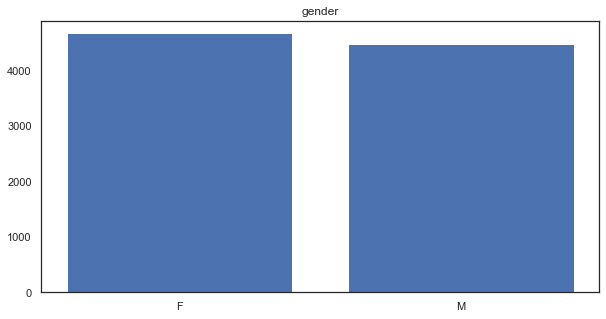

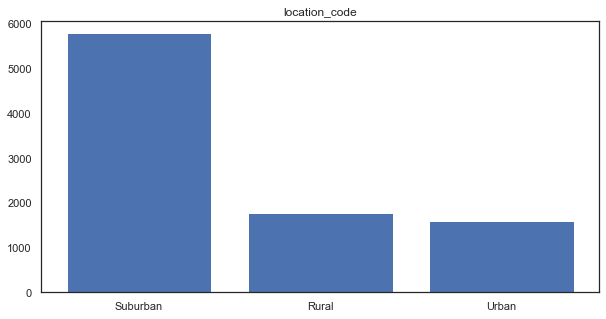

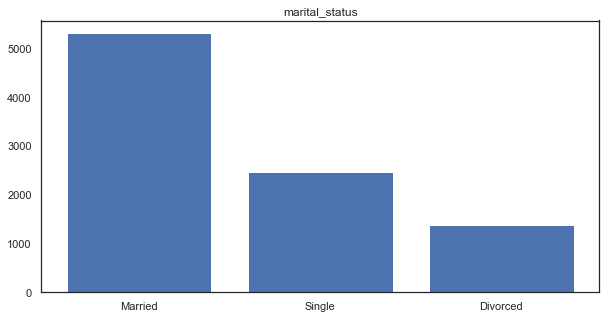

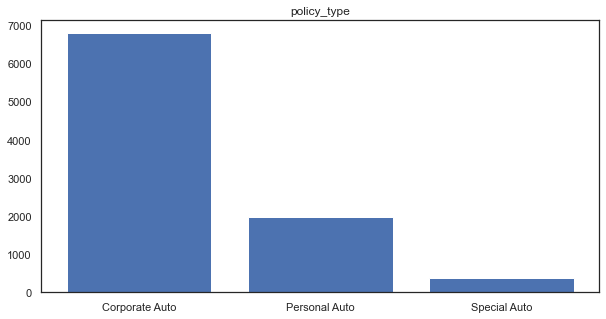

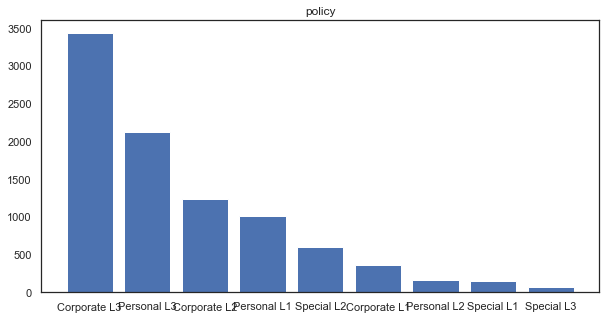

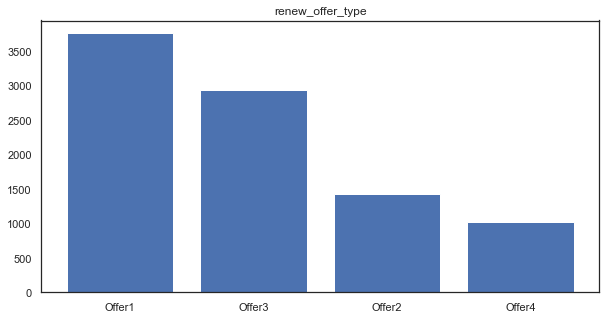

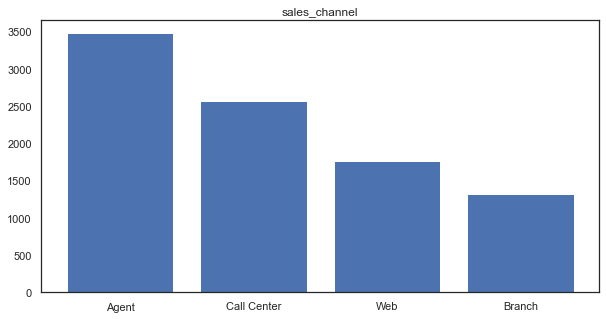

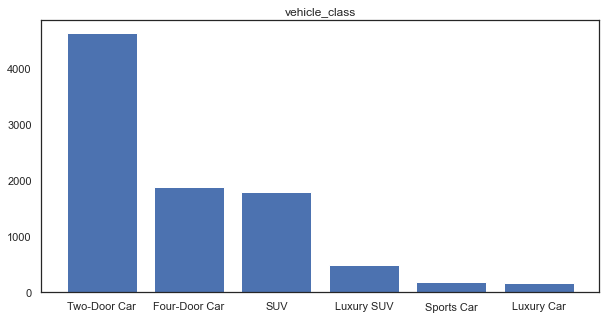

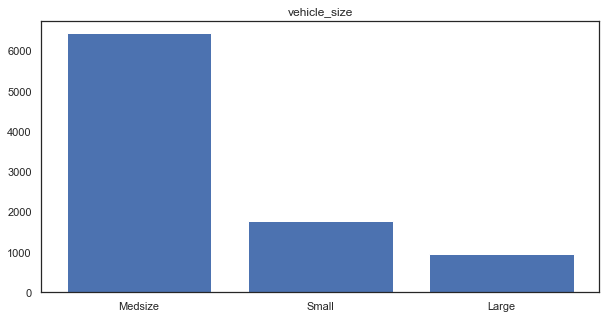

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
%matplotlib inline

for c in cat_cols:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show();

C:\Users\EB885UN\AppData\Local\Temp\ipykernel_27920\129339137.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle


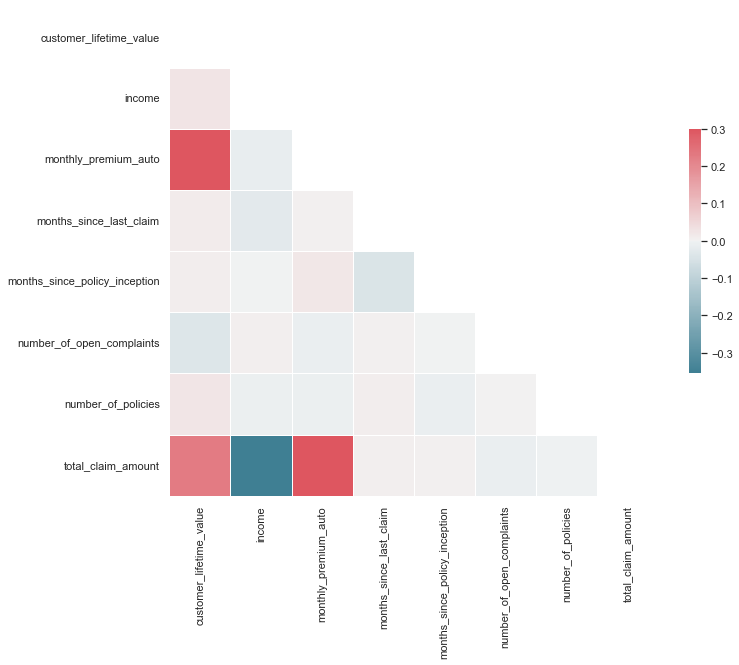

In [7]:
import numpy as np    # numerical python, algebra library


corr=data.corr()      # compute the correlation matrix


mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle

f, ax=plt.subplots(figsize=(11, 9))                 # set up the matplotlib figure

cmap=sns.diverging_palette(220, 10, as_cmap=True)   # generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});

<font color='magenta'>
Vemos los gráficos de distribución para ver como se comportan las variables (por si hay que aplicar logaritmos o quitar outliers) y una matriz de correlación entre ellas para ver si podemos descartar algunas (las que tengan una correlación superior a un listón)

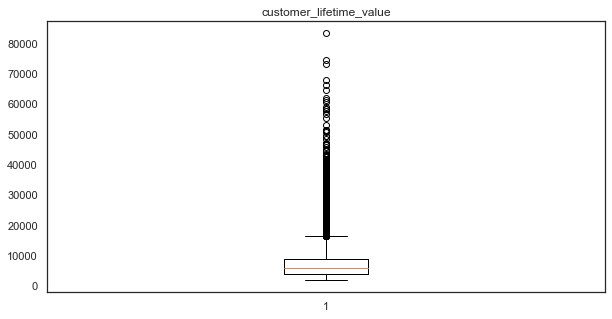

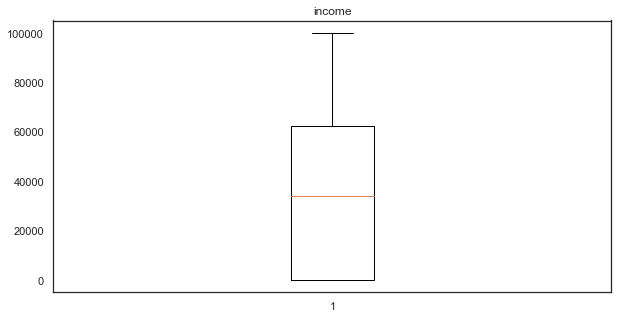

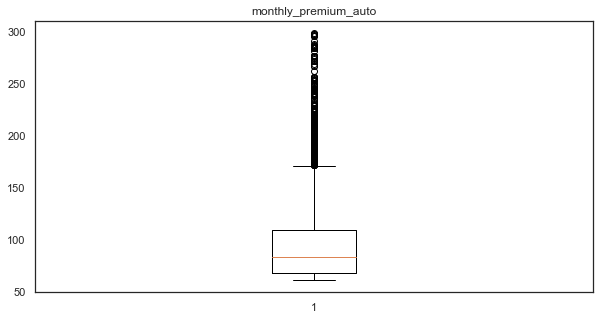

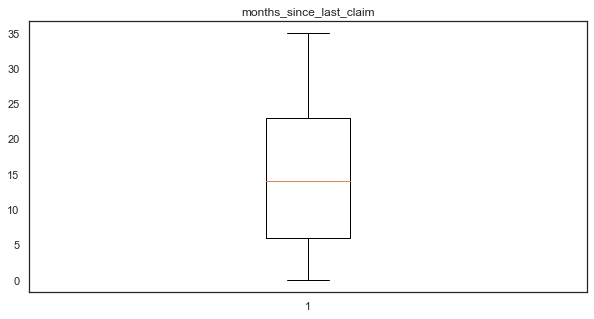

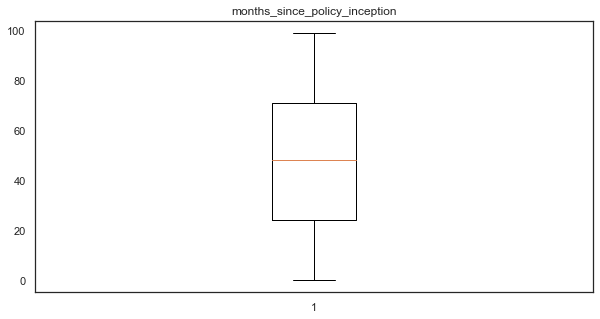

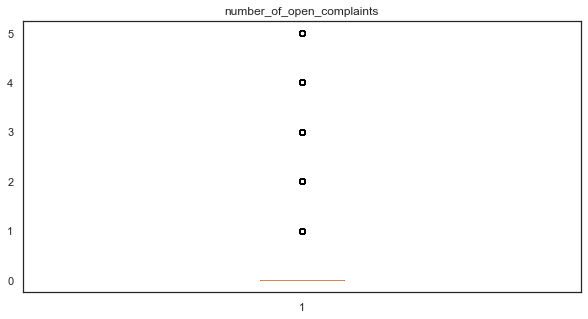

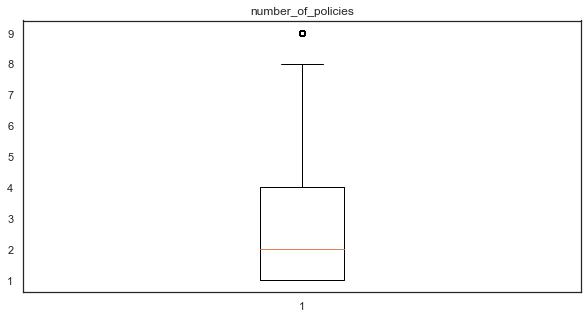

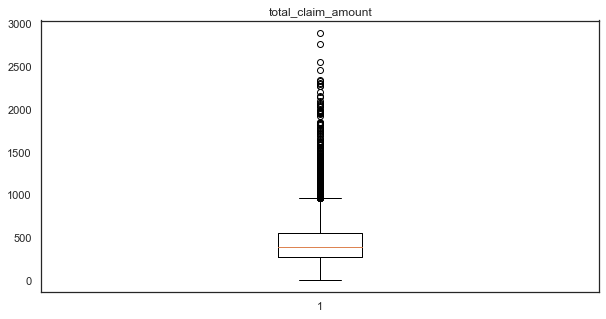

In [9]:
for c in num_cols:
    plt.figure(figsize=(10,5))
    plt.boxplot(data[c])
    plt.title(c)
    plt.show();

<font color='magenta'>
En línea con los gráficos de distribución, con los boxplot podemos sacar las mismas conclusiones pero con las variables numéricas (aplicar logaritmos u otro tipo de conversión y decidir si se quitarán outliers)

### 04 - Processing Data

- Dealing with outliers.

In [11]:
# e.g. 3*IQR in a column

q1=np.percentile(data['customer_lifetime_value'], 25)   # percentile 25
q3=np.percentile(data['customer_lifetime_value'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary

<font color='magenta'>
Definimos, para la variable customer lifetime value, los límites a partir de los cuales descartaríamos la informacón. En este caso, el filtrado no está aplicado, pero habría que quedarse lo que queda dentro del rango que limitan los dos límites.

- Normalization.

- Encoding Categorical Data.

- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.